Basic map for pipeline figure

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.patheffects as PathEffects
import numpy as np

In [ ]:
coordinates_data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_data_file = 'coordinates.xlsx'
df = pd.read_excel(f"{coordinates_data_path}/{coordinates_data_file}")
longs = df['Longitude'].values
lats = df['Latitude'].values
colors = ['xkcd:' + df['Color'].values[i] for i in range(0, len(longs))]

In [ ]:
plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs, 
            y=lats, 
            s=40, 
            c=colors,
            edgecolors='k',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
plt.savefig(f'{plot_path}/map_countries.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_countries.pdf', bbox_inches='tight')

In [ ]:
df_non_europe = df.loc[df['Europe'] == False, :]
longs_non_europe = df_non_europe['Longitude'].values
lats_non_europe = df_non_europe['Latitude'].values
colors_non_europe = ['xkcd:' + df_non_europe['Color'].values[i] for i in range(0, len(longs_non_europe))]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs_non_europe, 
            y=lats_non_europe, 
            s=150, 
            c=colors_non_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
ax.add_patch(patches.Rectangle(xy=(-15, 35), width=50, height=35, linewidth=2, facecolor='none', edgecolor='m', transform=ccrs.PlateCarree()))
plt.savefig(f'{plot_path}/map_non_europe.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_non_europe.pdf', bbox_inches='tight')

In [ ]:
df_europe = df.loc[df['Europe'] == True, :]
longs_europe = df_europe['Longitude'].values
lats_europe = df_europe['Latitude'].values
colors_europe = ['xkcd:' + df_europe['Color'].values[i] for i in range(0, len(longs_europe))]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.set_extent ((-15, 35, 35, 70), ccrs.PlateCarree())
plt.scatter(x=longs_europe, 
            y=lats_europe, 
            s=100,
            c=colors_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())

for spine in ax.spines.values():
    spine.set_edgecolor('m')
    spine.set_linewidth(2)

plt.savefig(f'{plot_path}/map_europe.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_europe.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs_non_europe, 
            y=lats_non_europe, 
            s=150, 
            c=colors_non_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
ax.add_patch(patches.Rectangle(xy=(-15, 35), width=50, height=35, linewidth=2, facecolor='none', edgecolor='m', transform=ccrs.PlateCarree()))

subax = plt.axes([0, 0, 0.5, 0.5], projection=ccrs.PlateCarree())
subax.stock_img()
subax.coastlines()
subax.set_extent ((-15, 35, 35, 70), ccrs.PlateCarree())
plt.scatter(x=longs_europe, 
            y=lats_europe, 
            s=100,
            c=colors_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())

ax.get_figure().canvas.draw()
p1 = ax.get_position()
p2 = subax.get_position()
subax.set_position([p1.x0+0.9*p2.width, p1.y0, p2.width*0.67, p2.height*0.67])
for spine in subax.spines.values():
    spine.set_edgecolor('m')
    spine.set_linewidth(2)
    
plt.savefig(f'{plot_path}/map.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map.pdf', bbox_inches='tight')

Maps with Aggregated EAA Sign

In [ ]:
data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/epi_est_stat/by_tissue/Blood/states'
eaa_data_file = 'aerr_mean.xlsx'
pace_data_file = 'pace_mean.xlsx'
eaa_df = pd.read_excel(f"{data_path}/{eaa_data_file}")
pace_df = pd.read_excel(f"{data_path}/{pace_data_file}")
aggregated_eaa_sign = [0] * eaa_df['State'].size
for index, row in eaa_df.iterrows():
    for clock_id in range(1, len(row)):
        if row.iloc[clock_id] > 0:
            aggregated_eaa_sign[index] += 1
        else:
            aggregated_eaa_sign[index] -= 1
eaa_df['Sign EAA'] = aggregated_eaa_sign
aggregated_pace_sign = [0] * pace_df['State'].size
for index, row in pace_df.iterrows():
    for clock_id in range(1, len(row)):
        if row.iloc[clock_id] > 1:
            aggregated_pace_sign[index] += 1
        else:
            aggregated_pace_sign[index] -= 1
pace_df['Sign PACE'] = aggregated_pace_sign
df = pd.merge(eaa_df, pace_df, on='State')
aggregated_sign = [0] * df['State'].size
for index, row in df.iterrows():
    aggregated_sign[index] = row['Sign EAA'] + row['Sign PACE']
df['Sign'] = aggregated_sign

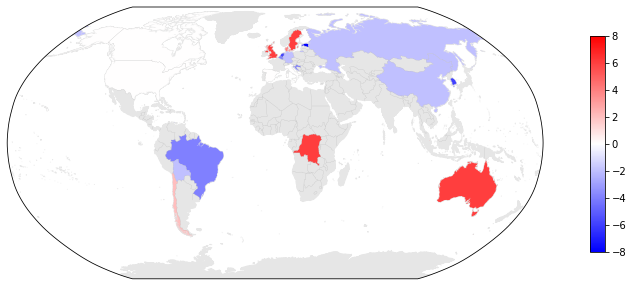

In [21]:
plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='0.9'))
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
states_signs = pd.Series(df.Sign.values, index=df.State).to_dict()
if 'UK' in states_signs:
    states_signs['United Kingdom'] = states_signs.pop('UK')
if 'USA' in states_signs:
    states_signs['United States of America'] = states_signs.pop('USA')
if 'Congo' in states_signs:
    states_signs['Dem. Rep. Congo'] = states_signs.pop('Congo')
geometries = {}
for country in countries:
    if country.attributes['NAME'] in states_signs:
        geometries[country.attributes['NAME']] = country.geometry
min_val = -abs(max(df.Sign.values, key=abs))
max_val = abs(max(df.Sign.values, key=abs))
norm = colors.Normalize(vmin=min_val, vmax=max_val)
cmap = plt.cm.bwr
for country in states_signs:
    ax.add_geometries(geometries[country], ccrs.PlateCarree(), facecolor=cmap(norm(states_signs[country])))
ax.add_feature(cfeature.BORDERS, edgecolor='0.7', linewidth=0.2)
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

plt.savefig(f'{plot_path}/map_sign_test.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_sign_test.pdf', bbox_inches='tight')

Map with Europe/non-Europe

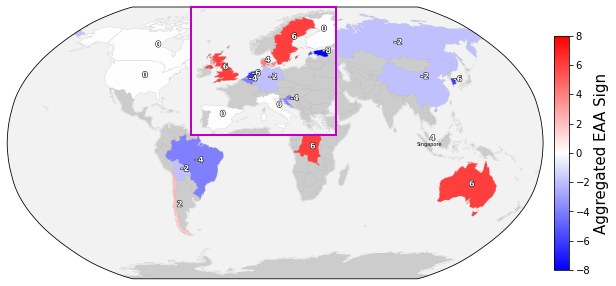

In [37]:
coordinates_data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_data_file = 'coordinates.xlsx'
df_coord = pd.read_excel(f"{coordinates_data_path}/{coordinates_data_file}", index_col=0)
df_europe = df_coord.loc[df_coord['Europe'] == True, :]
df_non_europe = df_coord.loc[df_coord['Europe'] == False, :]
dict_europe = df_europe.to_dict('index')
dict_non_europe = df_non_europe.to_dict('index')

data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/epi_est_stat/by_tissue/Blood/states'
eaa_data_file = 'aerr_mean.xlsx'
pace_data_file = 'pace_mean.xlsx'
eaa_df = pd.read_excel(f"{data_path}/{eaa_data_file}")
pace_df = pd.read_excel(f"{data_path}/{pace_data_file}")
aggregated_eaa_sign = [0] * eaa_df['State'].size
for index, row in eaa_df.iterrows():
    for clock_id in range(1, len(row)):
        if row.iloc[clock_id] > 0:
            aggregated_eaa_sign[index] += 1
        else:
            aggregated_eaa_sign[index] -= 1
eaa_df['Sign EAA'] = aggregated_eaa_sign
aggregated_pace_sign = [0] * pace_df['State'].size
for index, row in pace_df.iterrows():
    for clock_id in range(1, len(row)):
        if row.iloc[clock_id] > 1:
            aggregated_pace_sign[index] += 1
        else:
            aggregated_pace_sign[index] -= 1
pace_df['Sign PACE'] = aggregated_pace_sign
df = pd.merge(eaa_df, pace_df, on='State')
aggregated_sign = [0] * df['State'].size
for index, row in df.iterrows():
    aggregated_sign[index] = row['Sign EAA'] + row['Sign PACE']
df['Sign'] = aggregated_sign

plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.8'))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='0.95'))

shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

df_sign_non_europe = df.loc[df['State'].isin(dict_non_europe)]
df_sign_europe = df.loc[df['State'].isin(dict_europe)]
states_signs_non_europe = pd.Series(df_sign_non_europe.Sign.values, index=df_sign_non_europe.State).to_dict()
states_signs_europe = pd.Series(df_sign_europe.Sign.values, index=df_sign_europe.State).to_dict()
if 'USA' in states_signs_non_europe:
    states_signs_non_europe['United States of America'] = states_signs_non_europe.pop('USA')
    dict_non_europe['United States of America'] = dict_non_europe.pop('USA')
if 'Congo' in states_signs_non_europe:
    states_signs_non_europe['Dem. Rep. Congo'] = states_signs_non_europe.pop('Congo')
    dict_non_europe['Dem. Rep. Congo'] = dict_non_europe.pop('Congo')
if 'UK' in states_signs_europe:
    states_signs_europe['United Kingdom'] = states_signs_europe.pop('UK')
    dict_europe['United Kingdom'] = dict_europe.pop('UK')
geometries_non_europe = {}
geometries_europe = {}
for country in countries:
    if country.attributes['NAME'] in states_signs_non_europe:
        geometries_non_europe[country.attributes['NAME']] = country.geometry
    if country.attributes['NAME'] in states_signs_europe:
        geometries_europe[country.attributes['NAME']] = country.geometry

min_val = -abs(max(df.Sign.values, key=abs))
max_val = abs(max(df.Sign.values, key=abs))
norm = colors.Normalize(vmin=min_val, vmax=max_val)
cmap = plt.cm.bwr

for country in states_signs_non_europe:
    ax.add_geometries(geometries_non_europe[country], ccrs.PlateCarree(),
                      facecolor=cmap(norm(states_signs_non_europe[country])))
    ax.text(dict_non_europe[country]['Longitude'], dict_non_europe[country]['Latitude'],
            str(states_signs_non_europe[country]), transform=ccrs.PlateCarree(),
            fontsize=8, weight='bold', color='white',
            path_effects=[PathEffects.withStroke(linewidth=1, foreground="k")])

ax.text(95.0, -2.0, 'Singapore', transform=ccrs.PlateCarree(), fontsize=5, color='black')

ax.add_feature(cfeature.BORDERS, edgecolor='0.7', linewidth=0.2)
ax.add_feature(cfeature.COASTLINE, edgecolor='0.7', linewidth=0.2)

subax = plt.axes([0, 0, 0.5, 0.5], projection=ccrs.PlateCarree())
subax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.8'))
subax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='0.95'))
subax.set_extent((-12, 30, 35, 72), ccrs.PlateCarree())

for country in states_signs_europe:
    subax.add_geometries(geometries_europe[country], ccrs.PlateCarree(),
                         facecolor=cmap(norm(states_signs_europe[country])))
    subax.text(dict_europe[country]['Longitude'], dict_europe[country]['Latitude'],
               str(states_signs_europe[country]), transform=ccrs.PlateCarree(),
               fontsize=8, weight='bold', color='white',
               path_effects=[PathEffects.withStroke(linewidth=1, foreground="k")])

subax.add_feature(cfeature.BORDERS, edgecolor='0.7', linewidth=0.2)
subax.add_feature(cfeature.COASTLINE, edgecolor='0.7', linewidth=0.2)

ax.get_figure().canvas.draw()
p1 = ax.get_position()
p2 = subax.get_position()
subax.set_position([p1.x0 + p2.width * 0.9, p1.y0 + p2.height * 0.8, p2.width * 0.71, p2.height * 0.71])
for spine in subax.spines.values():
    spine.set_edgecolor('m')
    spine.set_linewidth(2)

cax = fig.add_axes([0.9, 0.15, 0.02, 0.65])
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
cb.set_label(label='Aggregated EAA Sign', size=15)

plt.savefig(f'{plot_path}/map_sign.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_sign.pdf', bbox_inches='tight')